In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/outlier_treatment.csv')

In [5]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6667.0,Carpet area: 450 (41.81 sq.m.),2.0,...,NaN,NaN,450.0,0.0,0.0,0.0,0.0,0.0,0.0,225.000000
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8101.0,Super Built up area 1617(150.22 sq.m.),2.0,...,1617.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,808.500000
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,1440.0,26042.0,Plot area 160(14.86 sq.m.),4.0,...,NaN,160.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,360.000000
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8107.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3.0,...,1832.0,NaN,1580.0,0.0,0.0,0.0,0.0,1.0,0.0,612.666667
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,1600.0,8875.0,Super Built up area 2390(222.04 sq.m.)Built Up...,4.0,...,2390.0,2000.0,1600.0,1.0,1.0,0.0,0.0,0.0,0.0,400.000000


In [6]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1056
agePossession             0
nearbyLocations         163
description               0
furnishDetails          946
rating                  331
property_id               0
super_built_up_area    1741
built_up_area          2047
carpet_area            1751
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
area_room_ratio           0
dtype: int64

In [7]:
df['sector'].value_counts()

sector nearby sohna road           171
sector 102                         113
sector 85                          109
sector 92                          105
sector 69                           94
sector 90                           91
sector 81                           90
sector 65                           90
sector 109                          88
sector 79                           80
sector 33                           71
sector 104                          71
sector 83                           69
sector 37d                          68
sector 86                           64
sector 89                           64
sector 2                            61
sector 50                           61
sector 107                          59
sector 95                           59
sector 108                          58
sector 43                           58
sector 48                           54
sector 70a                          54
sector 56                           54
sector 37c               

In [8]:
a = df['sector'].value_counts()[df['sector'].value_counts() >= 3]
df = df[df['sector'].isin(a.index)]

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

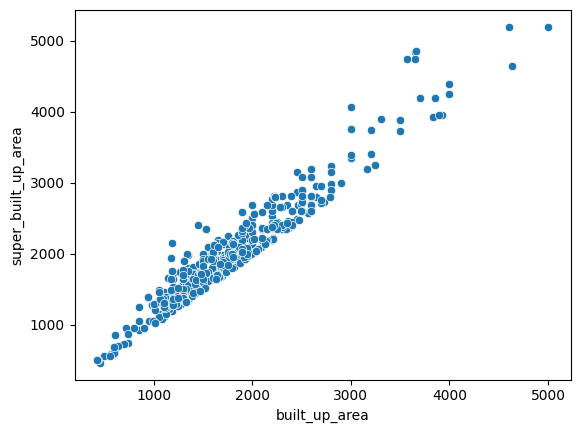

In [9]:
# Built up area

sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

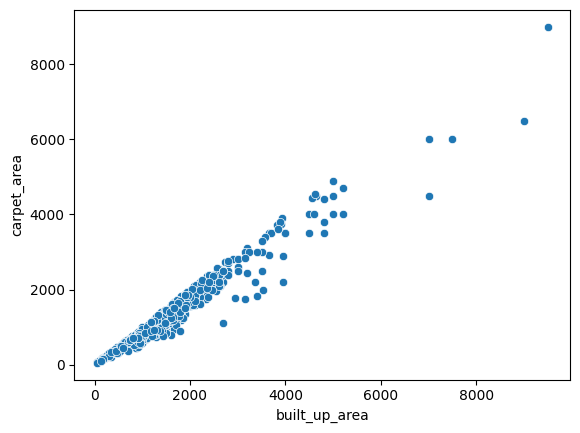

In [10]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [11]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [12]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [13]:
all_present_df.shape

(534, 32)

In [14]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [15]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [16]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8107.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3.0,...,1832.0,NaN,1580.0,0.0,0.0,0.0,0.0,1.0,0.0,612.666667
7,3 BHK Flat in Sector 37C Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37c,corona optus,1.25,1742.0,7176.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,...,1735.0,NaN,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,580.666667
20,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,pareena laxmi apartments,0.32,524.0,6107.0,Super Built up area 524(48.68 sq.m.)Carpet are...,2.0,...,524.0,NaN,424.8,0.0,0.0,0.0,0.0,0.0,0.0,262.000000
21,2 BHK Flat in Sector 81 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 81,signature global synera,0.40,633.0,6319.0,Super Built up area 633(58.81 sq.m.)Carpet are...,2.0,...,633.0,NaN,539.0,0.0,0.0,0.0,0.0,0.0,0.0,316.500000
37,2 BHK Flat in Sector 37C Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 37c,imperia the esfera,0.86,1578.0,5450.0,Super Built up area 1578(146.6 sq.m.)Carpet ar...,2.0,...,1578.0,NaN,1310.0,1.0,0.0,0.0,0.0,1.0,0.0,789.000000


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.104) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-19-ea3a8805fd6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.104) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1055
agePossession             0
nearbyLocations         163
description               0
furnishDetails          946
rating                  330
property_id               0
super_built_up_area    1738
built_up_area          1618
carpet_area            1748
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
area_room_ratio           0
dtype: int64

In [22]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8101.0,Super Built up area 1617(150.22 sq.m.),2.0,...,1617.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,808.500000
5,3 BHK Flat in Sector 69 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 69,tulip violet,1.37,1538.0,8908.0,Super Built up area 1538(142.88 sq.m.),3.0,...,1538.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,512.666667
8,2 BHK Flat in Sector 79 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 79,supertech araville,0.78,1295.0,6023.0,Super Built up area 1295(120.31 sq.m.),2.0,...,1295.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,647.500000
10,4 BHK Flat in Sector 48 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 48,bestech park view city,4.25,4553.0,9335.0,Super Built up area 4553(422.99 sq.m.),4.0,...,4553.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,1138.250000
11,4 BHK Flat in Sector 69 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 69,tulip violet,1.68,2010.0,8358.0,Super Built up area 2010(186.74 sq.m.),4.0,...,2010.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,502.500000


In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104),inplace=True)

<ipython-input-24-0741666b2069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104),inplace=True)


In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1055
agePossession             0
nearbyLocations         163
description               0
furnishDetails          946
rating                  330
property_id               0
super_built_up_area    1738
built_up_area           717
carpet_area            1748
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
area_room_ratio           0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6667.0,Carpet area: 450 (41.81 sq.m.),2.0,...,NaN,NaN,450.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
6,1 BHK Flat in Sector 95 Gurgaon,flat,https://www.99acres.com/1-bhk-bedroom-apartmen...,sector 95,ramsons kshitij,0.19,3215.0,591.0,Carpet area: 3212 (298.4 sq.m.),1.0,...,NaN,NaN,3212.0,0.0,0.0,0.0,0.0,0.0,0.0,3215.0
13,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,conscient habitat,0.35,545.0,6422.0,Carpet area: 545 (50.63 sq.m.),2.0,...,NaN,NaN,545.0,0.0,0.0,0.0,0.0,0.0,0.0,272.5
15,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,signature global city 37d ph 2,1.07,1299.0,8237.0,Carpet area: 1305 (121.24 sq.m.),3.0,...,NaN,NaN,1305.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0
34,3 BHK Flat in Sector-33 Sohna,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 33,godrej nature plus serenity,1.39,1200.0,11583.0,Carpet area: 1200 (111.48 sq.m.),3.0,...,NaN,NaN,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0


In [29]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-29-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [30]:
df.update(c_df)

In [31]:
df.isnull().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1055
agePossession             0
nearbyLocations         163
description               0
furnishDetails          946
rating                  330
property_id               0
super_built_up_area    1738
built_up_area             0
carpet_area            1748
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

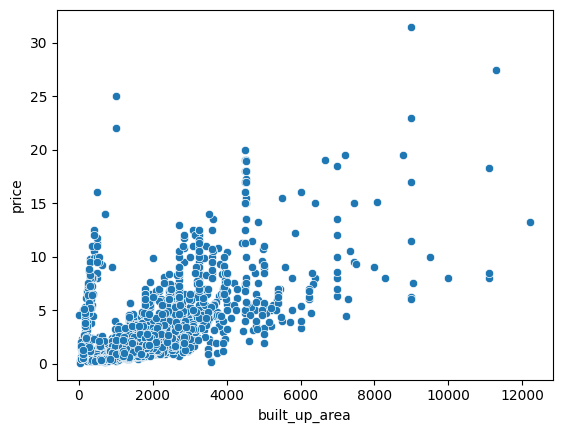

In [32]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [33]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [34]:
anamoly_df.sample(5)

,price,area,built_up_area
160,3.87,2250.0,1713.0
330,2.80,1500.0,1500.0
344,2.80,1828.0,1828.0
632,11.00,4050.0,360.0
374,4.50,1350.0,1350.0


In [35]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [36]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

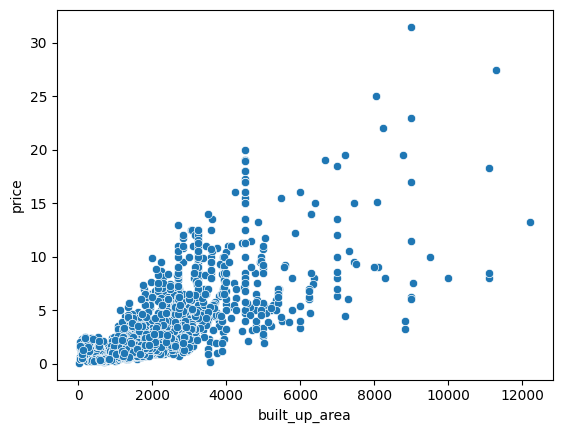

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,...,furnishDetails,rating,property_id,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,6667.0,2.0,1.0,0,...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...","['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314,500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,8101.0,2.0,2.0,3+,...,NaN,NaN,S69145532,1465.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,26042.0,4.0,4.0,3,...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588,1440.0,0.0,1.0,0.0,0.0,0.0,2.0
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,8107.0,3.0,3.0,3,...,"['1 Wardrobe', '1 Chimney', '1 Modular Kitchen...","['Green Area4.5 out of 5', 'Construction4.5 ou...",H70022084,1707.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,8875.0,4.0,4.0,3,...,NaN,"['Green Area5 out of 5', 'Construction4.5 out ...",V65295042,2000.0,1.0,1.0,0.0,0.0,0.0,0.0


In [40]:
df.isnull().sum()

property_name         0
property_type         0
link                  0
sector                0
society               0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
address               9
floorNum              0
facing             1055
agePossession         0
nearbyLocations     163
description           0
furnishDetails      946
rating              330
property_id           0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
dtype: int64

In [41]:
# floorNum
df['floorNum'].value_counts()

2.0     492
3.0     484
1.0     340
4.0     282
8.0     195
10.0    184
6.0     184
7.0     182
5.0     172
9.0     170
12.0    160
0.0     133
14.0    120
11.0    115
15.0     83
16.0     52
17.0     50
13.0     42
18.0     37
19.0     34
20.0     26
21.0     16
23.0     15
22.0     14
24.0     11
25.0      9
27.0      8
30.0      5
26.0      5
33.0      4
31.0      4
28.0      4
29.0      3
43.0      2
35.0      2
40.0      2
32.0      2
39.0      2
34.0      2
45.0      1
38.0      1
51.0      1
44.0      1
Name: floorNum, dtype: int64

In [42]:
df1=df.copy()
df.drop(['address', 'nearbyLocations', 'furnishDetails', 'rating'], inplace=True, axis=1)

In [43]:
df.isnull().sum()

property_name         0
property_type         0
link                  0
sector                0
society               0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
floorNum              0
facing             1055
agePossession         0
description           0
property_id           0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
dtype: int64

In [44]:
df1.isnull().sum()

property_name         0
property_type         0
link                  0
sector                0
society               0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
address               9
floorNum              0
facing             1055
agePossession         0
nearbyLocations     163
description           0
furnishDetails      946
rating              330
property_id           0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
dtype: int64

<Axes: ylabel='facing'>

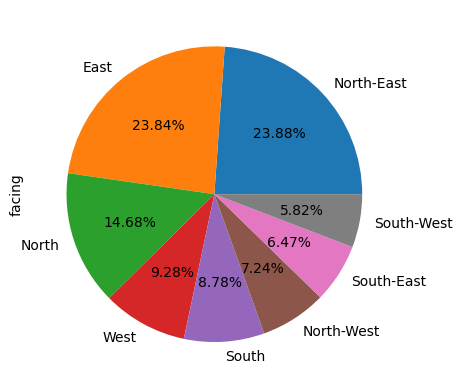

In [45]:
# facing
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [46]:
df.drop(columns=['facing'],inplace=True)

In [47]:
df.sample(5)

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,...,agePossession,description,property_id,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
1529,4 Bedroom House for sale in DLF Phase 4,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 28,independent,4.50,13889.0,4.0,4.0,0,...,Undefined,Best in class property available at dlf city p...,L68904950,3240.0,0.0,0.0,0.0,0.0,0.0,0.0
1313,3 BHK Flat in Sector 102 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 102,emaar gurgaon greens,1.35,8182.0,3.0,3.0,3,...,Relatively New,Gurgaon greens is a spectacular property place...,C64607518,1315.0,0.0,1.0,0.0,0.0,0.0,0.0
2450,3 BHK Flat in Sector 69 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 69,tulip violet,1.76,9514.0,3.0,4.0,2,...,Relatively New,Ground floor 1850 sqft this 3 bhk flat is loca...,V69722022,1676.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,3 BHK Flat in Sector 85 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 85,godrej air,2.60,12212.0,3.0,3.0,3,...,Under Construction,3bhk multistorey apartment for resale in godre...,H67904032,2129.0,0.0,1.0,0.0,0.0,0.0,0.0
2069,4 BHK Flat in Sector 72 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 72,tata primanti,6.75,19286.0,4.0,4.0,3+,...,New Property,This lovely 4 bhk apartment/flat in sector 72 ...,R70100752,4000.0,0.0,1.0,0.0,0.0,0.0,2.0


In [48]:
# agePossession
df['agePossession'].value_counts()

Relatively New        1625
New Property           589
Moderately Old         550
Undefined              317
Old Property           293
Under Construction     277
Name: agePossession, dtype: int64

In [49]:
df[df['agePossession'] == 'Undefined']

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,...,agePossession,description,property_id,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,6667.0,2.0,1.0,0,...,Undefined,"2bhk affordable, ready to shift in sec 99a lax...",O66187314,500.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2 BHK Flat in Sector 67A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 67a,ireo the corridors,1.30,10031.0,2.0,2.0,2,...,Undefined,Best in class property available at sector 67a...,K69999718,1296.0,0.0,0.0,0.0,0.0,0.0,0.0
38,2 BHK Flat in Sector 69 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 69,tulip lemon,0.60,11407.0,2.0,1.0,1,...,Undefined,Best in class property available at sector 69 ...,U70031524,584.0,0.0,0.0,0.0,0.0,0.0,0.0
42,3 Bedroom House for sale in Sector 103 Gurgaon,house,https://www.99acres.com/3-bhk-bedroom-independ...,sector 103,independent,2.25,6367.0,3.0,5.0,3+,...,Undefined,3bhk penthouse for resale in sector 103 sector...,R68478332,3534.0,0.0,0.0,0.0,0.0,0.0,0.0
54,4 Bedroom House for sale in Subhash Nagar,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 12,independent,0.90,13333.0,2.0,4.0,0,...,Undefined,Best in class property available at subhash na...,J69911244,675.0,0.0,0.0,0.0,0.0,0.0,0.0
60,3 BHK Flat in Sector 95 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 95,ramprasta awho,0.92,5257.0,3.0,3.0,3+,...,Undefined,"3 bath, unfurnished, 13th floor (Of 26), overl...",O64571990,1750.0,0.0,0.0,0.0,0.0,0.0,0.0
107,2 Bedroom House for sale in Ashok Vihar Phase ...,house,https://www.99acres.com/2-bhk-bedroom-independ...,sector 3,independent,0.75,6410.0,2.0,2.0,0,...,Undefined,This spacious residential house has total 1 fl...,R69772636,130.0,0.0,0.0,0.0,0.0,0.0,0.0
111,2 BHK Flat in Sector 93 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 93,signature global orchard avenue,0.40,5479.0,2.0,2.0,0,...,Undefined,Best in class property available at sector 93 ...,R69930434,730.0,0.0,0.0,0.0,0.0,0.0,0.0
119,2 BHK Flat in Sohna,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector nearby sohna road,signature global park,0.75,6938.0,2.0,2.0,0,...,Undefined,Best in class property available at sector 36 ...,N69750278,1081.0,0.0,0.0,0.0,0.0,0.0,0.0
145,3 Bedroom House for sale in Sector 3 Gurgaon,house,https://www.99acres.com/3-bhk-bedroom-independ...,sector 3,independent,0.90,8929.0,3.0,1.0,0,...,Undefined,Looking for a good 3 bhk independent house in ...,E70113272,1008.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [51]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [52]:
df['agePossession'].value_counts()

Relatively New        1752
New Property           630
Moderately Old         592
Old Property           326
Under Construction     294
Undefined               57
Name: agePossession, dtype: int64

In [53]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [54]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [55]:
df['agePossession'].value_counts()

Relatively New        1761
New Property           631
Moderately Old         599
Old Property           332
Under Construction     294
Undefined               34
Name: agePossession, dtype: int64

In [56]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [57]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [58]:
df['agePossession'].value_counts()

Relatively New        1763
Moderately Old         631
New Property           631
Old Property           332
Under Construction     294
Name: agePossession, dtype: int64

In [59]:
df.isnull().sum()

property_name      0
property_type      0
link               0
sector             0
society            0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
additionalRoom     0
floorNum           0
agePossession      0
description        0
property_id        0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
dtype: int64

In [60]:
df.shape

(3651, 22)

In [61]:
df.to_csv('/content/gdrive/MyDrive/Project - Real Estate/missing_value_imputation.csv',index=False)